# Stage 1

There are three sections in this notebook:
1. [Generating Circuits]()
2. [Running Circuits on IBMQ Hardware]()
3. [Converting Hardware Jobs into CSV files]()

Each seciton briefly explains the background information for the section, and the fucntions belonging to that section. Note that the functions in section 2 and 3 call the fucntions from section 1 in their definitions.

Imports

In [1]:

import sys
sys.path.append('../')

from qiskit_ibm_runtime import QiskitRuntimeService
from investigation_functions import circuit_funcs, data_extract_funcs
import config

## 1. Generating Circuits

Three different circuits which can be scaled to different numbers of qubits are used in this investigation. The circuits that will be tested in this investigation will have circuit sizes of 4, 8, and 16 qubits. The circuits are equivalent to identity operations. The circuits are in the form of a 'V' shape that can be seen later in this section.

We label our circuits as 'Cnot','Cnot_X','Swap'. A single circuit can be generated using the make_circuit() function, or all three circuits (in an array) can be generated using the make_set_of_3() function.

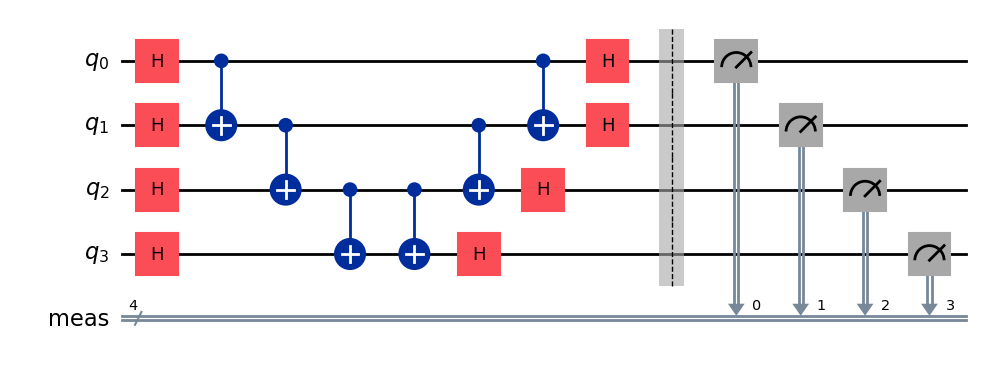

In [2]:
circuit_label = 'Cnot'
nr_qubits = 4
C_not = circuit_funcs.make_circuit(nr_qubits,circuit_label)
C_not.draw("mpl")

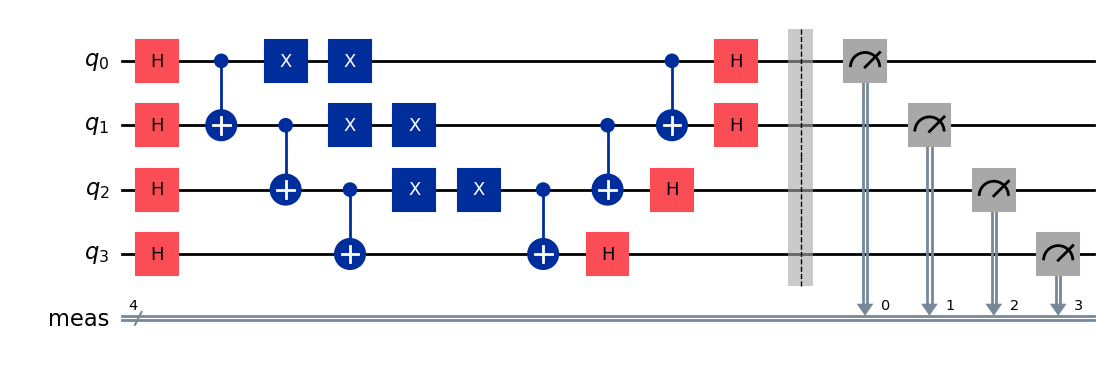

In [3]:
all_3 = circuit_funcs.make_set_of_3(nr_qubits)
all_3[1].draw("mpl")

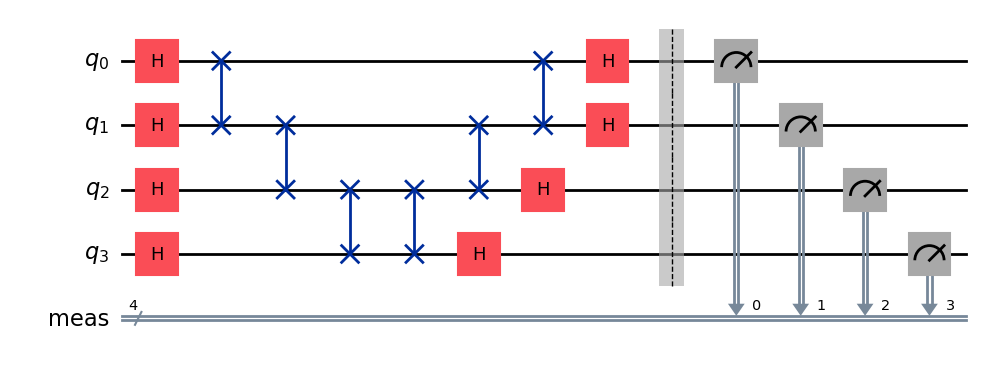

In [4]:
all_3[2].draw("mpl")

## 2. Running Circuits on IBMQ Hardware


### Backends
The 4 backends that are used in this investigation are Torino, Brisbane, Fez, and Marrakesh.
Torino is Heron r1, Brisbane is Eagle ... , while Fez and Marrakesh are both Heron r2. 


All of the available IBM QPUs can be found at this link:
https://quantum.cloud.ibm.com/computers


In [5]:
backends = ['ibm_brisbane','ibm_torino','ibm_fez','ibm_marrakesh']

Set up your QiskitRuntimeService

In [6]:
service = QiskitRuntimeService(channel = config.channel, token = config.tokenJAPI, instance = config.instanceJAPI)

You can check which backends your service has access to. Make sure that you have access to the backends you intend to use.

In [7]:
service.backends()

[<IBMBackend('ibm_pittsburgh')>,
 <IBMBackend('ibm_fez')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kingston')>,
 <IBMBackend('ibm_torino')>,
 <IBMBackend('ibm_marrakesh')>]

Uncomment the code block below to send your jobs to the IBM backends. The function inside the loop, send_and_record(), will send all three circuits to each backend in your list. One job contains all three circuits. The jobs are run with the SamplerV2() primitive, so the results will be counts. There is one job ID per backend per function call. It will store the job IDs that into the text file that is given to it. If the text file does not exist, the function will create it. If the file does exist, the fucntion will just append to it.

The job IDs will be added to the test file in the same order that is given in the 'backends' array. The timestamp of when the jobs were sent is recorded after all of the job IDs. eg.

- backends[0] job ID
- backends[1] job ID
- ...
- timestamp

The loop will run for the specified number of runs. 

In [8]:
##simple for loop to make data collection automated
# nr_of_runs = 50
# nr_qubits =4
## set the filename that you want the job IDs to be stored in. Note that the function 
## does not automatically put the file into any directory.
# file_name = "Job_IDs_8qubits_fez_marr.txt"

# for run in range(nr_of_runs): 
#     lines =circuit_funcs.send_and_record(nr_qubits,file_name,backends,service)


## 3. Converting Hardware Jobs into CSV files

This should be done once the jobs have been completed, ie. they are not pending. The results from the hardware runs are split into one csv file per cicruit, per backend. The file names are constructed with the following format: <'nr_qubits'>q_<'backend_name'><'circuit_type'>.csv 

The circuits 'Cnot','Cnot_X', and 'Swap' are stored as the integer circuit_types 1,2,3 respectively.

In [2]:
service = QiskitRuntimeService(channel = config.channel, token = config.tokenJAPI, instance = config.instanceJAPI)

In [3]:

# This is the set up to use results_to_csv2
nr_qubits = 4
dir = "../../Hardware_results/testing/"
job_id_file = dir+"testing_ids.txt"
backends = ['ibm_fez','ibm_marrakesh']

# NB if create_csvs_ is True, a new csv file will be made and overwrite any existing csv file by that name.
# To append to an existing csv file, make sure to set create_csvs_ to False
create_csvs_=True


In [5]:
#This will read through all of the job IDs and convert the results into the csv files.
data_extract_funcs.results_to_csv2(backends, nr_qubits,dir,job_id_file,service, create_csvs_)

AttributeError: 'str' object has no attribute 'keys'